In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
# Modify path to find code directory:
import sys
sys.path.append('../code/')

import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp
import itertools


In [3]:
from structures import *
from utils import initialize_rewards, initialize_values, policy_iteration


## Test Problem 1 - Inner Circle, Single Connectivity

In [4]:
agents = [
    Agent(receptivity=0.5,persuasiveness=0.5),
    Agent(receptivity=0.5,persuasiveness=0.5),
    Agent(receptivity=0.5,persuasiveness=0.5),
    Agent(receptivity=0.5,persuasiveness=0.5),
    Agent(receptivity=0.5,persuasiveness=0.5),
]

# Add some connections (only use inner circle):
agents[0].inner_circle.append(agents[1].id)
agents[1].inner_circle.append(agents[0].id)
agents[1].inner_circle.append(agents[2].id)
agents[2].inner_circle.append(agents[1].id)
agents[1].inner_circle.append(agents[3].id)
agents[3].inner_circle.append(agents[1].id)
agents[3].inner_circle.append(agents[4].id)
agents[4].inner_circle.append(agents[3].id)

# - REMINDER - Do we want to have connections automatically propagate both ways when specified?

# Build simulation environment:
env = Environment(agents, seed=182)
print(env)


<Environment with 0/5 informed agents>


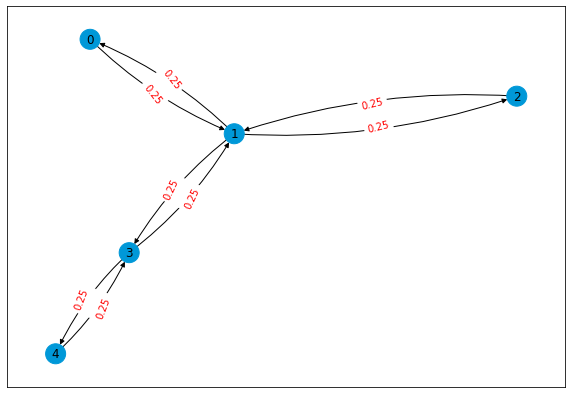

In [5]:
env.plot_network_graph(figsize=(10,7))


In [6]:
env.update_transition_matrix(intervention_n=1)


# Initialize a policy and MDP problem setup
initial_policy = np.zeros(len(env.state_space), dtype=int)
rewards = initialize_rewards(env.state_space)
values = initialize_values(env.state_space)

optimal_policy = policy_iteration(env, initial_policy, values, rewards, gamma = 0.99, epsilon=1e-8)


20 iterations run - max delta = 0.0349327440464009
40 iterations run - max delta = 0.00031544667280858363
60 iterations run - max delta = 1.7495377369058929e-06
80 iterations run - max delta = 7.856618466917098e-09


In [7]:
optimal_policy


array([1, 1, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 3, 2, 2, 2, 3, 3,
       4, 1, 4, 2, 2, 2, 4, 3, 4, 0])

## Test Problem 2 - Inner Circle, Multiple Groups

In [8]:
agents = [
    Agent(receptivity=0.5,persuasiveness=0.5),
    Agent(receptivity=0.5,persuasiveness=0.5),
    Agent(receptivity=0.5,persuasiveness=0.5),
    Agent(receptivity=0.5,persuasiveness=0.5),
    Agent(receptivity=0.5,persuasiveness=0.5),
    Agent(receptivity=0.5,persuasiveness=0.5),
    Agent(receptivity=0.5,persuasiveness=0.5)
]

# Add some connections (only use inner circle):
agents[0].inner_circle.extend([agents[3].id, agents[4].id])
agents[3].inner_circle.append(agents[0].id)
agents[4].inner_circle.append(agents[0].id)

agents[1].inner_circle.extend([agents[5].id])
agents[5].inner_circle.append(agents[1].id)

agents[2].inner_circle.extend([agents[6].id])
agents[6].inner_circle.append(agents[2].id)

# - REMINDER - Do we want to have connections automatically propagate both ways when specified?

# Build simulation environment:
env = Environment(agents, seed=182)
print(env)


<Environment with 0/7 informed agents>


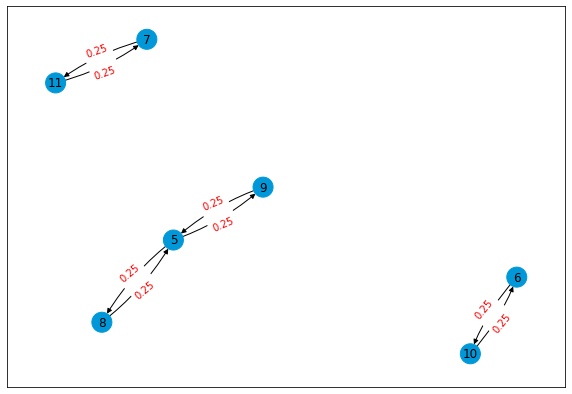

In [10]:
env.plot_network_graph(figsize=(10,7))


In [60]:
env.update_transition_matrix(intervention_n=1)


# Initialize a policy and MDP problem setup
initial_policy = np.zeros(len(env.state_space), dtype=int)
rewards = initialize_rewards(env.state_space)
values = initialize_values(env.state_space)

optimal_policy = policy_iteration(env, initial_policy, values, rewards, gamma = 0.99, epsilon=1e-8)


20 iterations run - max delta = 0.004075486805413142
40 iterations run - max delta = 1.0570819354960292e-05
60 iterations run - max delta = 2.7418129988632245e-08


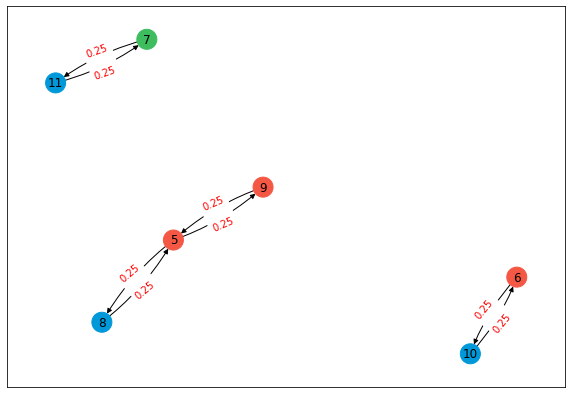

In [61]:
test_state = 100

action_nodes = np.zeros(len(env.agent_ids), dtype=int)
action_nodes[optimal_policy[test_state]] = 1

env.plot_network_graph(influenced = env.state_space[test_state], action_nodes=action_nodes, figsize=(10,7))


## Add timings for Transition Generation
